In [30]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as st

import tensorflow as tf
import tensorflow_datasets as tfds

from zipfile import ZipFile
from io import BytesIO
from urllib.request import urlopen
from sklearn.metrics import confusion_matrix, precision_recall_curve, PrecisionRecallDisplay, ConfusionMatrixDisplay

from statsmodels.formula.api import logit,ols
from statsmodels.api import Logit

from sklearn.preprocessing import LabelBinarizer, OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, ElasticNet
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor

from sklearn.datasets import fetch_olivetti_faces, load_breast_cancer

# Lecture #5

## Review of Linear Regression

### Example 1

In [3]:
with urlopen('https://archive.ics.uci.edu/static/public/291/airfoil+self+noise.zip') as url:
    zf = ZipFile(BytesIO(url.read()))
    air = pd.read_csv(zf.open('airfoil_self_noise.dat'),sep='\t',decimal=',',header=None)

air = air.astype(float)
air

,0,1,2,3,4,5
0,800.0,0.0,0.3048,71.3,0.002663,126.201
1,1000.0,0.0,0.3048,71.3,0.002663,125.201
2,1250.0,0.0,0.3048,71.3,0.002663,125.951
3,1600.0,0.0,0.3048,71.3,0.002663,127.591
4,2000.0,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500.0,15.6,0.1016,39.6,0.052849,110.264
1499,3150.0,15.6,0.1016,39.6,0.052849,109.254
1500,4000.0,15.6,0.1016,39.6,0.052849,106.604
1501,5000.0,15.6,0.1016,39.6,0.052849,106.224


In [4]:
air.columns = ['a','b','c','d','e','f']
air

,a,b,c,d,e,f
0,800.0,0.0,0.3048,71.3,0.002663,126.201
1,1000.0,0.0,0.3048,71.3,0.002663,125.201
2,1250.0,0.0,0.3048,71.3,0.002663,125.951
3,1600.0,0.0,0.3048,71.3,0.002663,127.591
4,2000.0,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500.0,15.6,0.1016,39.6,0.052849,110.264
1499,3150.0,15.6,0.1016,39.6,0.052849,109.254
1500,4000.0,15.6,0.1016,39.6,0.052849,106.604
1501,5000.0,15.6,0.1016,39.6,0.052849,106.224


In [5]:
air.corr()

,a,b,c,d,e,f
a,1.000000,-0.272765,-0.003661,0.133664,-0.230107,-0.390711
b,-0.272765,1.000000,-0.504868,0.058760,0.753394,-0.156108
c,-0.003661,-0.504868,1.000000,0.003787,-0.220842,-0.236162
d,0.133664,0.058760,0.003787,1.000000,-0.003974,0.125103
e,-0.230107,0.753394,-0.220842,-0.003974,1.000000,-0.312670
f,-0.390711,-0.156108,-0.236162,0.125103,-0.312670,1.000000


In [6]:
model = ols('a ~ b + c + d + e + f', data=air).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      a   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     255.5
Date:                Tue, 12 Mar 2024   Prob (F-statistic):          1.29e-197
Time:                        13:06:25   Log-Likelihood:                -13777.
No. Observations:                1503   AIC:                         2.757e+04
Df Residuals:                    1497   BIC:                         2.760e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.184e+04   1281.352     32.655      0.000    3.93e+04    4.44e+04
b           -261.6384     18.274    -14.318      0.000    -297.484    -225.793
c          -1.491e+04    817.333    -18.236      0.000   -1.65e+04   -1.33e+04
d             49.6442      3.910     12.696      0.000      41.974      57.314
e          -3.857e+04   7404.754     -5.209      0.000   -5.31e+04    -2.4e+04
f           -298.3235      9.796    -30.452      0.000    -317.540    -279.107
==============================================================================
Omnibus:                      360.562   Durbin-Watson:                   0.809
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1640.898
Skew:                           1.063   Prob(JB):                         0.00
Kurtosis:                       7.656   Cond. No.                     1.68e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.68e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
b,1.0,1.110647e+09,1.110647e+09,206.425764,6.005564e-44
c,1.0,4.004056e+08,4.004056e+08,74.419714,1.583880e-17
d,1.0,3.652751e+08,3.652751e+08,67.890328,3.730259e-16
e,1.0,7.775369e+06,7.775369e+06,1.445136,2.295001e-01
f,1.0,4.989436e+09,4.989436e+09,927.340537,6.421817e-159
Residual,1497.0,8.054415e+09,5.380370e+06,NaN,NaN


In [8]:
model = ols('a ~ c + d + f', data=air).fit_regularized(method='elastic_net')

N = air.shape[1]
RSS = np.linalg.norm(air['a']-model.fittedvalues)
RSE = np.linalg.norm(air['a']-air['a'].mean())
R2 = 1 - RSS/RSE
R2

0.03881753905141083

In [9]:
def bootstrap(X,y,model,N=10):
    scores = []
    for i in range(N):
        X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.75)
        model.fit(X_train,y_train)
        scores.append(model.score(X_test,y_test))
    stderr = st.sem(scores)
    mean = np.mean(scores)
    interval = st.t.interval(0.05, df=N-1, loc=mean, scale=stderr)
    return interval

In [10]:
model= LinearRegression()

X = air[['b','c','d','e','f']]
y = air['a']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

res = model.fit(X_train,y_train)
res.score(X_test,y_test)

0.2803160477679546

In [11]:
bootstrap(X,y,Ridge())

(0.43487886570767176, 0.43656512132634384)

### Example 2



In [14]:
raw_df = pd.read_csv('../data/boston.csv', sep="\s+", skiprows=22, header=None)
boston_X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
boston_X = pd.DataFrame(boston_X, columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
boston_X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [15]:
boston_X.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [16]:
boston_y = raw_df.values[1::2, 2]
boston_y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [17]:
bootstrap(boston_X,boston_y,ElasticNet())

(0.6844400901866597, 0.6855453127611414)

### Example 3

In [18]:
bp = pd.read_csv('https://online.stat.psu.edu/onlinecourses/sites/stat501/files/data/bloodpress.txt',sep='\t')
del bp['Pt']
bp

,BP,Age,Weight,BSA,Dur,Pulse,Stress
0,105,47,85.4,1.75,5.1,63,33
1,115,49,94.2,2.10,3.8,70,14
2,116,49,95.3,1.98,8.2,72,10
3,117,50,94.7,2.01,5.8,73,99
4,112,51,89.4,1.89,7.0,72,95
5,121,48,99.5,2.25,9.3,71,10
6,121,49,99.8,2.25,2.5,69,42
7,110,47,90.9,1.90,6.2,66,8
8,110,49,89.2,1.83,7.1,69,62
9,114,48,92.7,2.07,5.6,64,35


In [19]:
bp.corr()

,BP,Age,Weight,BSA,Dur,Pulse,Stress
BP,1.000000,0.659093,0.950068,0.865879,0.292834,0.721413,0.163901
Age,0.659093,1.000000,0.407349,0.378455,0.343792,0.618764,0.368224
Weight,0.950068,0.407349,1.000000,0.875305,0.200650,0.659340,0.034355
BSA,0.865879,0.378455,0.875305,1.000000,0.130540,0.464819,0.018446
Dur,0.292834,0.343792,0.200650,0.130540,1.000000,0.401514,0.311640
Pulse,0.721413,0.618764,0.659340,0.464819,0.401514,1.000000,0.506310
Stress,0.163901,0.368224,0.034355,0.018446,0.311640,0.506310,1.000000


In [20]:
model = ols('BP ~ Age + Weight + BSA + Dur + Pulse + Stress', data=bp).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     BP   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     560.6
Date:                Tue, 12 Mar 2024   Prob (F-statistic):           6.40e-15
Time:                        13:07:07   Log-Likelihood:                -6.1033
No. Observations:                  20   AIC:                             26.21
Df Residuals:                      13   BIC:                             33.18
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.8705      2.557     -5.034      0.000     -18.394      -7.347
Age            0.7033      0.050     14.177      0.000       0.596       0.810
Weight         0.9699      0.063     15.369      0.000       0.834       1.106
BSA            3.7765      1.580      2.390      0.033       0.363       7.190
Dur            0.0684      0.048      1.412      0.182      -0.036       0.173
Pulse         -0.0845      0.052     -1.637      0.126      -0.196       0.027
Stress         0.0056      0.003      1.633      0.126      -0.002       0.013
==============================================================================
Omnibus:                        7.219   Durbin-Watson:                   2.249
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                4.643
Skew:                          -1.050   Prob(JB):                       0.0981
Kurtosis:                       4.076   Cond. No.                     4.02e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
Age,1.0,243.265993,243.265993,1466.914008,9.383807e-15
Weight,1.0,311.910080,311.910080,1880.843514,1.887190e-15
BSA,1.0,1.767784,1.767784,10.659886,6.148767e-03
Dur,1.0,0.335104,0.335104,2.020704,1.787113e-01
Pulse,1.0,0.123074,0.123074,0.742149,4.045839e-01
Stress,1.0,0.442106,0.442106,2.665937,1.264913e-01
Residual,13.0,2.155858,0.165835,NaN,NaN


In [22]:
bootstrap(bp[['Age','Weight','BSA','Dur','Pulse','Stress']], bp['BP'], ElasticNet())

(0.9662086570791055, 0.9674002697029456)

## Logistic Regression

### Example 3 

In [23]:
with urlopen('https://archive.ics.uci.edu/static/public/272/skillcraft1+master+table+dataset.zip') as url:
    zf = ZipFile(BytesIO(url.read()))
    skill = pd.read_csv(zf.open('SkillCraft1_Dataset.csv'))

skill

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.000000,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.000000,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.000000,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.000000,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.000000,0.000019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3390,10089,8,?,?,?,259.6296,0.020425,0.000743,9,0.000621,0.000146,0.004555,18.6059,42.8342,6.2754,46,0.000877,5,0.000000,0.000000
3391,10090,8,?,?,?,314.6700,0.028043,0.001157,10,0.000246,0.001083,0.004259,14.3023,36.1156,7.1965,16,0.000788,4,0.000000,0.000000
3392,10092,8,?,?,?,299.4282,0.028341,0.000860,7,0.000338,0.000169,0.004439,12.4028,39.5156,6.3979,19,0.001260,4,0.000000,0.000000
3393,10094,8,?,?,?,375.8664,0.036436,0.000594,5,0.000204,0.000780,0.004346,11.6910,34.8547,7.9615,15,0.000613,6,0.000000,0.000631


In [24]:
X = skill[['APM','SelectByHotkeys','AssignToHotkeys','MinimapAttacks','MinimapRightClicks',
          'NumberOfPACs','GapBetweenPACs','ActionLatency','ActionsInPAC','WorkersMade',
          'ComplexUnitsMade','ComplexAbilitiesUsed']]
y = skill['LeagueIndex'] == 1

In [25]:
X.corr()

,APM,SelectByHotkeys,AssignToHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,WorkersMade,ComplexUnitsMade,ComplexAbilitiesUsed
APM,1.000000,0.840693,0.578416,0.271021,0.322179,0.651237,-0.575275,-0.722402,0.383985,0.349692,0.136143,0.131587
SelectByHotkeys,0.840693,1.000000,0.504526,0.197158,0.143368,0.398505,-0.304290,-0.415388,0.163282,0.141723,0.044002,0.061037
AssignToHotkeys,0.578416,0.504526,1.000000,0.242196,0.193043,0.486729,-0.396891,-0.482191,0.093668,0.183065,0.144603,0.154410
MinimapAttacks,0.271021,0.197158,0.242196,1.000000,0.242269,0.177343,-0.237633,-0.199904,0.134804,0.077624,0.040239,0.044528
MinimapRightClicks,0.322179,0.143368,0.193043,0.242269,1.000000,0.176137,-0.254466,-0.230660,0.307512,0.206594,0.091604,0.090650
NumberOfPACs,0.651237,0.398505,0.486729,0.177343,0.176137,1.000000,-0.506261,-0.820334,-0.232018,0.277891,0.181484,0.168293
GapBetweenPACs,-0.575275,-0.304290,-0.396891,-0.237633,-0.254466,-0.506261,1.000000,0.689402,-0.311072,-0.235419,-0.074659,-0.090566
ActionLatency,-0.722402,-0.415388,-0.482191,-0.199904,-0.230660,-0.820334,0.689402,1.000000,-0.110224,-0.309175,-0.186407,-0.184372
ActionsInPAC,0.383985,0.163282,0.093668,0.134804,0.307512,-0.232018,-0.311072,-0.110224,1.000000,0.251795,0.052725,0.054536
WorkersMade,0.349692,0.141723,0.183065,0.077624,0.206594,0.277891,-0.235419,-0.309175,0.251795,1.000000,0.203637,0.101942


In [26]:
model = LogisticRegression(max_iter=1500)
bootstrap(X,y,model)

(0.9549674393295444, 0.9552799104937773)

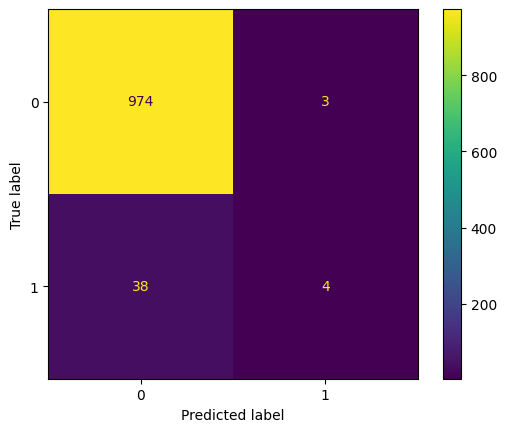

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cm).plot()

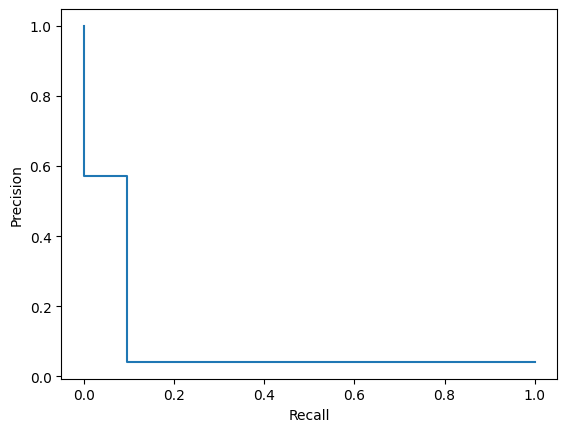

In [28]:
pre,rec,_ = precision_recall_curve(y_test,y_pred)
PrecisionRecallDisplay(precision=pre,recall=rec).plot()

In [31]:
res = Logit(endog=y,exog=X).fit()
res.params

         Current function value: 0.734957
         Iterations: 35


/home/kaygun/.local/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/home/kaygun/.local/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


APM                          0.030164
SelectByHotkeys           -307.829985
AssignToHotkeys          -1726.446812
MinimapAttacks         -384347.099983
MinimapRightClicks         847.809902
NumberOfPACs             -1667.920618
GapBetweenPACs               0.045916
ActionLatency                0.049169
ActionsInPAC                -0.581979
WorkersMade              -2061.710202
ComplexUnitsMade       -205384.907433
ComplexAbilitiesUsed      3897.861306
dtype: float64

In [32]:
res.pvalues

APM                     1.815085e-01
SelectByHotkeys         7.100323e-02
AssignToHotkeys         1.040017e-01
MinimapAttacks          3.777286e-11
MinimapRightClicks      1.125028e-01
NumberOfPACs            8.164665e-05
GapBetweenPACs          1.468080e-06
ActionLatency           8.327627e-07
ActionsInPAC            1.265876e-02
WorkersMade             5.329828e-06
ComplexUnitsMade        6.077050e-02
ComplexAbilitiesUsed    2.822669e-03
dtype: float64

In [33]:
res.conf_int()

,0,1
APM,-0.014084,0.074412
SelectByHotkeys,-642.003410,26.343439
AssignToHotkeys,-3807.801210,354.907586
MinimapAttacks,-498267.641014,-270426.558952
MinimapRightClicks,-199.216722,1894.836526
NumberOfPACs,-2497.734622,-838.106614
GapBetweenPACs,0.027228,0.064604
ActionLatency,0.029612,0.068726
ActionsInPAC,-1.039481,-0.124476
WorkersMade,-2949.548303,-1173.872102


### Example 4

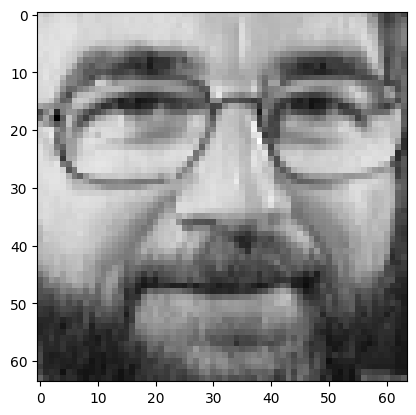

In [34]:
faces = fetch_olivetti_faces(data_home='/home/kaygun/local/data/scikit_learn_data/')

m = np.random.randint(400)
img = faces.data[m,:].reshape((64,64))
plt.imshow(img,cmap='gray')

In [35]:
X = faces.images.reshape(400,64*64)
encoder = LabelBinarizer()
ys = encoder.fit_transform(faces.target)
model = LogisticRegression(max_iter=1500)

bootstrap(X,ys[:,2],model)

(0.9868623823675161, 0.9871376176324836)

In [36]:
res = Logit(endog=ys[:,2],exog=X).fit()
res.params

/home/kaygun/.local/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/home/kaygun/.local/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


         Current function value: inf
         Iterations: 35


LinAlgError: Singular matrix

In [ ]:
def experiment(X,y, model):
    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.75)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return confusion_matrix(y_test,y_pred)

In [ ]:
res = experiment(X,faces.target,LogisticRegression(max_iter=1000))

In [ ]:
ConfusionMatrixDisplay(res).plot()

# Support Vector Machine

(Lecture on white board)

In [388]:
cancer = load_breast_cancer()
X = cancer['data']
y = cancer['target']

In [394]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [390]:
model = SVC()
bootstrap(X,y,model)

(0.9178258365848958, 0.9185377997787406)

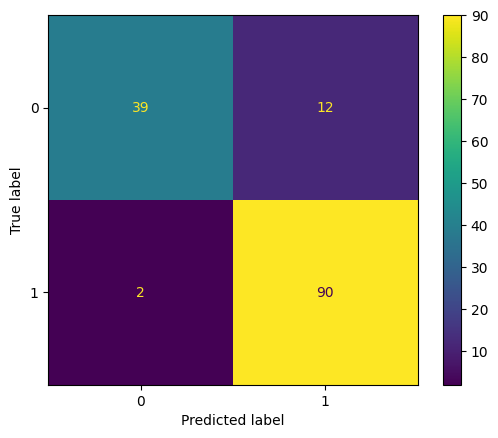

In [392]:
cm = experiment(X,y,SVC())
ConfusionMatrixDisplay(cm).plot()

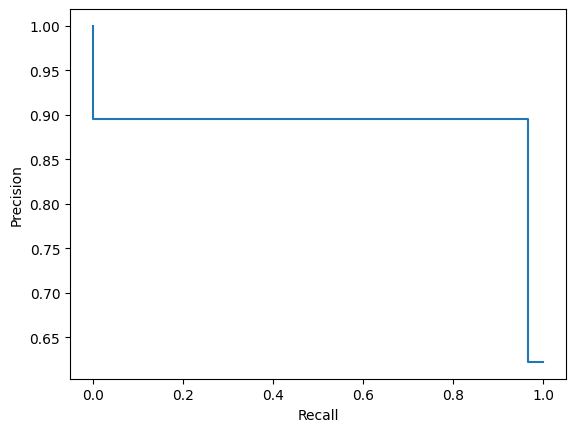

In [397]:
model = SVC(max_iter=2000)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
pre,rec,_ = precision_recall_curve(y_test,y_pred)
PrecisionRecallDisplay(precision=pre,recall=rec).plot()

/home/kaygun/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


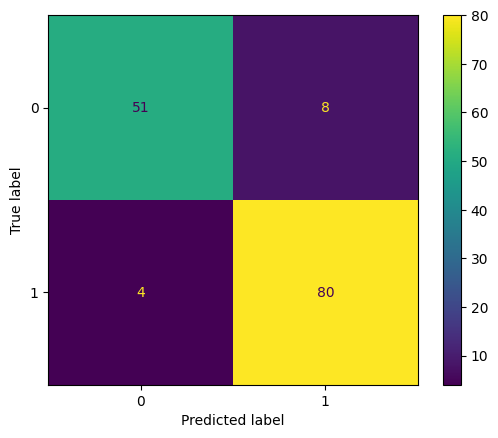

In [393]:
cm = experiment(X,y,LogisticRegression())
ConfusionMatrixDisplay(cm).plot()

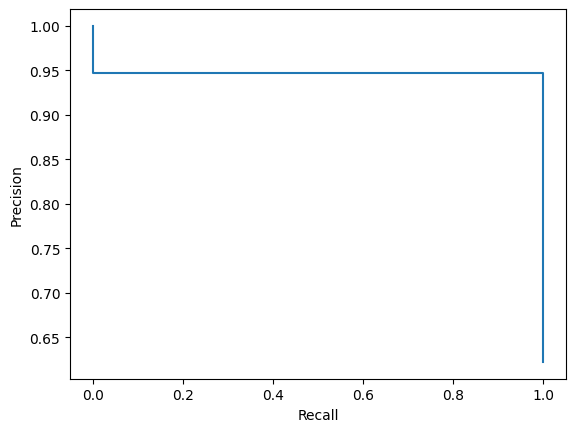

In [396]:
model = LogisticRegression(max_iter=2000)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
pre,rec,_ = precision_recall_curve(y_test,y_pred)
PrecisionRecallDisplay(precision=pre,recall=rec).plot()